In [4]:
# load environment variables
import os
from dotenv import load_dotenv
import h5py

load_dotenv()

PPG2ABP_PATH = os.getenv("PPG2ABP_PATH") 

# Processed data

In [5]:


processed_data_file = "data.hdf5"


with h5py.File(f'{PPG2ABP_PATH}/data/{processed_data_file}', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['data']>


In [6]:
len(data)

127260

In [7]:
data[0].shape

(2, 1250)

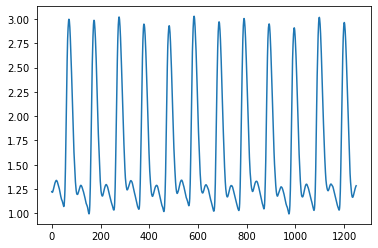

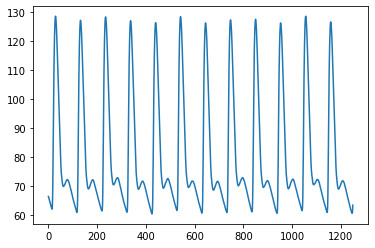

In [8]:
# plot data[0]
import matplotlib.pyplot as plt
plt.plot(data[0][1])
plt.show()
plt.plot(data[0][0])
plt.show()

0


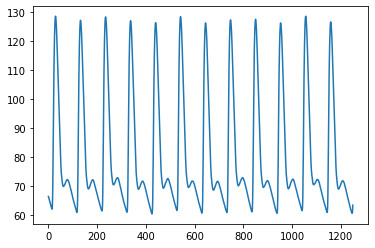

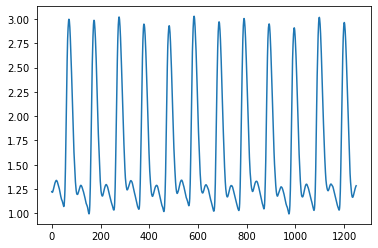

------------------
1


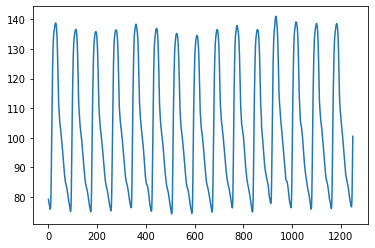

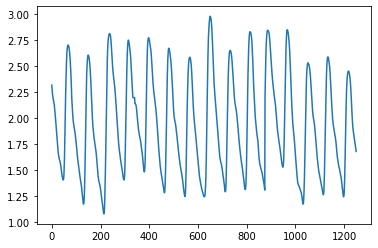

------------------
2


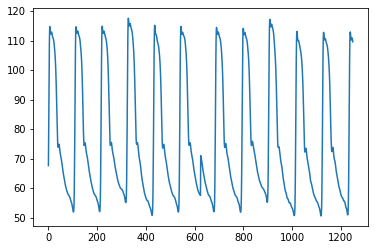

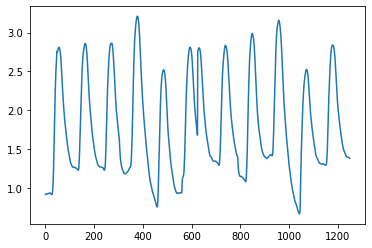

------------------
3


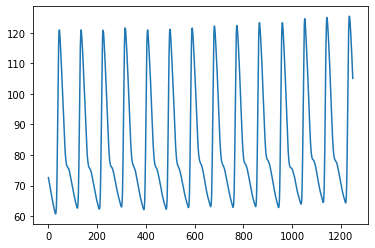

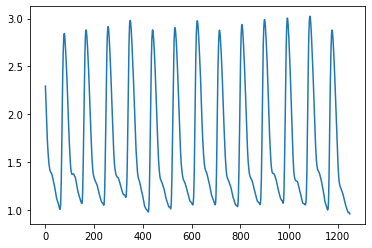

------------------
4


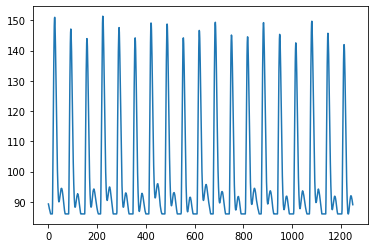

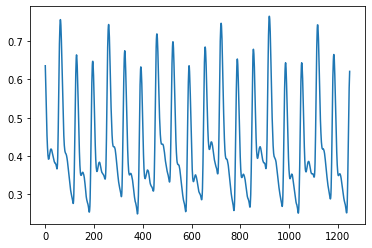

------------------
5


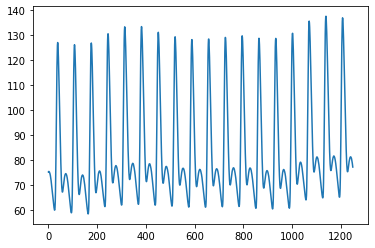

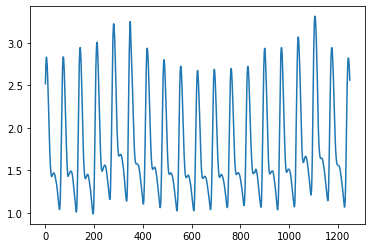

------------------
6


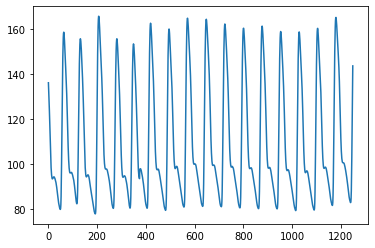

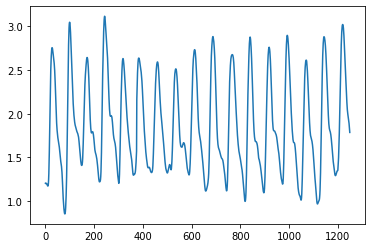

------------------
7


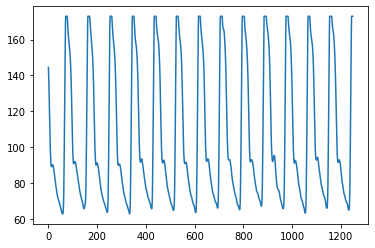

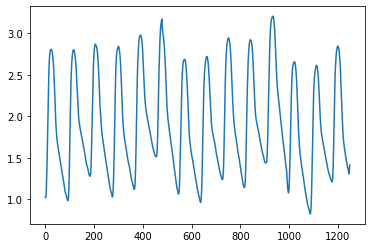

------------------
8


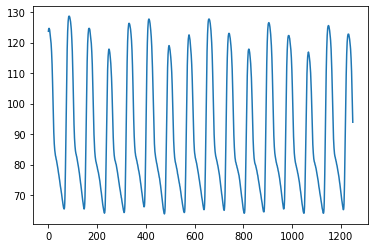

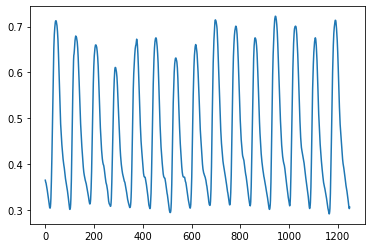

------------------
9


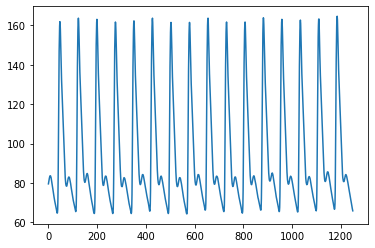

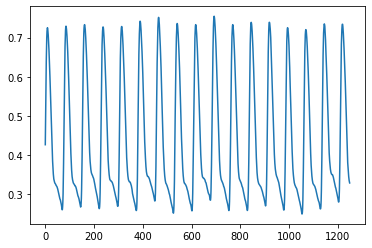

------------------


In [9]:
for i in range(10):
    print(i)
    plt.plot(data[i][0])
    plt.show()
    plt.plot(data[i][1])
    plt.show()
    print('------------------')

In [10]:
import numpy as np

def plot_fft(signal_data):
    specturm = np.fft.fft(signal_data)
    freq = np.fft.fftfreq(len(signal_data))

    plt.plot(freq, np.abs(specturm))
    plt.title("Frecuency Spectrum of Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    print(specturm, freq)

[100146.53188338  +0.j           -241.87660066 -44.82025837j
   -344.6713254  -96.96013626j ...   -353.80472019+103.59723639j
   -344.6713254  +96.96013626j   -241.87660066 +44.82025837j] [ 0.      0.0008  0.0016 ... -0.0024 -0.0016 -0.0008]


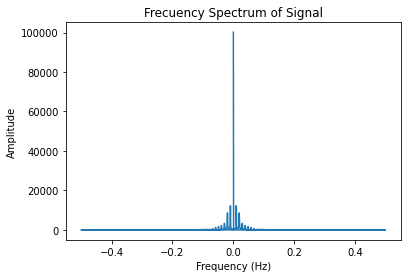

In [11]:
plot_fft(data[0][0])


[ 2.03081720e+03+0.j         -8.31792145e+00-2.22891033j
 -1.69231464e+00+0.26033405j ... -5.64659936e+00-5.53042099j
 -1.69231464e+00-0.26033405j -8.31792145e+00+2.22891033j] [ 0.      0.0008  0.0016 ... -0.0024 -0.0016 -0.0008]


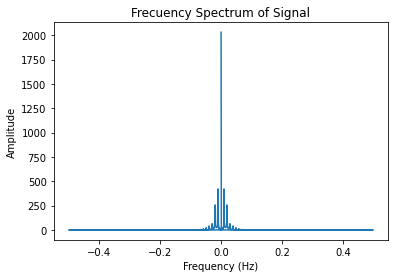

In [12]:
plot_fft(data[0][1])

# Preprocess data

In [13]:
from tqdm import tqdm
import h5py
import os
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
file_i = 1
ky = f'Part_{file_i}' # key
f = h5py.File(f'{PPG2ABP_PATH}/raw_data/Part_{file_i}.mat', 'r')
f.keys()

<KeysViewHDF5 ['#refs#', 'Part_1']>

In [15]:
len(f[ky])

3000

In [23]:
#f[f[key][obj_in_key][0]]
f[f[ky][3][0]][2][:]

array([ 2.24242424, 75.17107648,  0.19990225])

In [25]:
#f[f[key][obj_in_key][0]]
f[f[ky][3][0]][0][:]

array([ 2.44281525, 76.09911446,  0.19990225])

In [26]:
#f[f[key][obj_in_key][0]]
f[f[ky][3][0]][1][:]

array([ 2.34506354, 75.65951752,  0.19990225])

In [33]:
f[f[ky][6][0]][0][:]

array([1.54838710e+00, 9.16315396e+01, 1.46627566e-02])

In [17]:

for i in tqdm(range(len(f[ky])),desc='Reading Records'):
    signal = []
    bp = []
    for j in range(2):
        signal.append(f[f[ky][i][0]][j][0])
        bp.append(f[f[ky][i][0]][j+2][0])


Reading Records: 100%|██████████| 3000/3000 [00:19<00:00, 152.49it/s]


In [27]:
bp

[0.6207233626588465, 0.6549364613880743]